## Training

We need to understand backpropagation first. 

### Backpropagation

Let's take a look at a very simple backpropagation. 
$$ z = x\times y $$ 

We would like to calculate 
$$dz/dx$$ 
or 
$$dz/dy$$ 

Let's say $t = x \times y$.
Then,

$$dz/dx = dz/dt \cdot dt/dx = 1 \cdot dt/dx = y $$
$$dz/dy = dz/dt \cdot dt/dy = 1 \cdot dt/dy = x $$

Another example is 
$$ z = x + y $$

when $t = x + y$,

$$dz/dx = dz/dt \cdot dt/dx = 1 \cdot 1 = 1 $$
$$dz/dy = dz/dt \cdot dt/dy = 1 \cdot 1 = 1 $$

Now let's implement it

In [45]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y  # exchange x and y
        dy = dout * self.x

        return dx, dy


class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

##### example

Can you implement following forward propagation?

apple_price = apple $\times$ apple_num

price = apple_price $\times$ tax

In [46]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

In [47]:
print("price:", int(price))

('price:', 220)


##### answer:

```
('price:', 220)
```

we would like to calculate how much it changes in apple_price, tax and apple_number when the price changes by 1. 

So it is backward propagation!

In [48]:
# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)


print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

('dApple:', 2.2)
('dApple_num:', 110)
('dTax:', 200)


##### answer:

```
('dApple:', 2.2)
('dApple_num:', 110)
('dTax:', 200)
```

Following example is a little bit comlicated but it is the same concept. 

apple_price = apple $\times$ apple_num

orgnage_price = orange $\times$ orange_num

all_price = apple_price + orange_price

price = all_price $\times$ tax


In [49]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
#missing one line?
#-> 

print("price:", int(price))

('price:', 715)


##### answer:

```
('price:', 715)
```

we would like to calculate how much it changes in apple_price, orange_price, apple_number, orange_number and tax when the price changes by 1. 

In [14]:
# backward
dprice = 1
##missing one line
#-> 
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

('dApple:', 2.2)
('dApple_num:', 110)
('dOrange:', 3.3000000000000003)
('dOrange_num:', 165)
('dTax:', 650)


##### answer:

```
('dApple:', 2.2)
('dApple_num:', 110)
('dOrange:', 3.3000000000000003)
('dOrange_num:', 165)
('dTax:', 650)
```

##### ReLU activation function 

$$\begin{align}
    y &= x ~(x \gt 0) \\        
      &= 0 ~(x \leq 0) 
\end{align}$$

$$\begin{align}
    \frac{\partial y}{\partial x} &= 1 ~(x \gt 0) \\        
      &= 0 ~(x \leq 0) 
\end{align}$$

backward with <b>ReLU</b> function

if x $\gt$ 0, 

$$\frac{\partial L}{\partial y} \to \frac{\partial L}{\partial y}$$ 

if x $\leq$ 0, 

$$\frac{\partial L}{\partial y} \to 0 $$ 


In [ ]:
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = ( x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

##### Sigmoid activation function

$$ y = \frac{1}{1+e^{-x}}$$

$$ \frac{\partial y}{\partial x} = y^2 e^{-x} = y (1-y) $$ 

backward with sigmoid function

$$ \frac{\partial L}{\partial y} \to \frac{\partial L}{\partial y} y(1-y) $$ 

In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / 1(1+np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx

### Derivatives

$$\frac{ df(x) }{ dx } = \displaystyle{\lim_{h \to 0}} \frac{ f(x+h) - f(x) }{ h }$$



##### numerical gradient

In [2]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

Let's take derivatives for this function
$$y = 0.01x^2+0.1x$$

0.199999999999


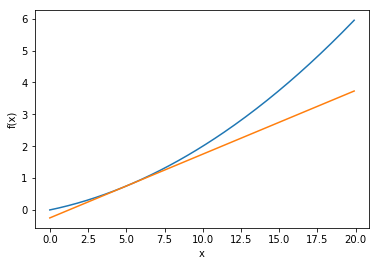

In [3]:
def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y # this is a function of t 
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

##### Partial derivatives

We will calculate partial derivatives for the function
$$ f = x^2 + y^2 $$
And we will make the tangent lines in 2D. 

2


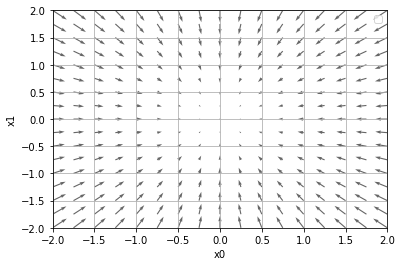

In [43]:
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # create a shape
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) calculation
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) calculation
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # put the original value back
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

##### Gradient decent 

In [39]:
#We will use the function "numerical_gradient" which was created previously 

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

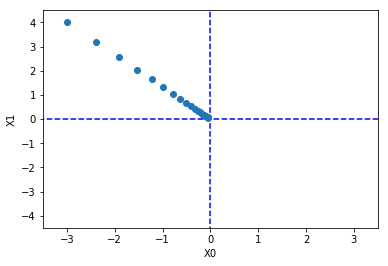

In [34]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

##### confirm with numerical gradient

check the difference between numerical calculation and gradient with analytical method 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import sys, os

from dataset.mnist import load_mnist
# for now we will use the existing class for the model. But later we will build our own model. 
from two_layer_net import TwoLayerNet

# reading data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# take the average in difference
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

### Simple network

We will create a very simple network for exercise to understand the shape of the weights

We will use existing library for functions to make the example simple. 

In [7]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        np.random.seed(0) # we will use the same see in order to have the same answer always
        self.W = np.random.randn(2,3) # random number generator according to normal Gaussian distribution 

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [8]:
#create a object of the model 
net = simpleNet()

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)

# the derivatives will return the shape of W. 
print(dW)

[[ 0.44452826  0.14014461 -0.58467287]
 [ 0.66679239  0.21021692 -0.87700931]]


##### answer:
```
[[ 0.44452826  0.14014461 -0.58467287]
 [ 0.66679239  0.21021692 -0.87700931]]
```

### Build your own model 

We will create a class of network with two hidden layers with 2 weight and 2 bias parameters

In [22]:
from common.functions import *
from common.gradient import numerical_gradient
import pickle

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # initialize the weights and bias
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : input variables, t : true value
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : input variable, t : true value
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        #can you build the second hidden layer and output with softmax function? 
        #you need to use the weight W2 and b2 in this second hidden layer for a2
        #for example, a2=np.dot(z1, W2) + b2 and put it into softmax function for output y
        #at least two lines
      
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

Reading data

In [35]:
from dataset.mnist import load_mnist

# reading data
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

Call the network

In [24]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

Now set hyperparameters

In [25]:
# hyperparameters
iters_num = 10000  # set the number of iterations
train_size = x_train.shape[0]
batch_size = 100   #  mini batch size
learning_rate = 0.1

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7820666666666667, 0.7864
train acc, test acc | 0.8745666666666667, 0.8802
train acc, test acc | 0.8979, 0.9017
train acc, test acc | 0.9084666666666666, 0.9103
train acc, test acc | 0.9152333333333333, 0.9176
train acc, test acc | 0.9203333333333333, 0.9211
train acc, test acc | 0.9248666666666666, 0.9256
train acc, test acc | 0.9269, 0.9281
train acc, test acc | 0.9319, 0.9306
train acc, test acc | 0.9353666666666667, 0.9355
train acc, test acc | 0.9377666666666666, 0.9381
train acc, test acc | 0.9403666666666667, 0.9407
train acc, test acc | 0.9427166666666666, 0.9416
train acc, test acc | 0.9443, 0.9415
train acc, test acc | 0.9461166666666667, 0.9437
train acc, test acc | 0.9479333333333333, 0.9455


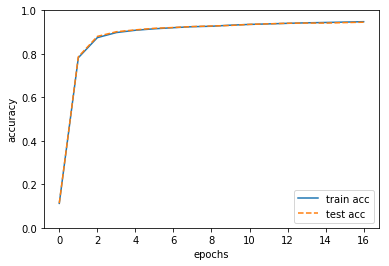

In [26]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

# how many iterations per epoch 
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # obtain mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # gradient calculation 
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # update parameters : weight and bias
    for key in ('W1', 'b1', 'W2', 'b2'): # we need to update the parameters in network
        network.params[key] -= learning_rate * grad[key]
    
    # save progress
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # accuracy ca1uation per epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

#save the model for later use
network.save_params("simpleTwoLayer.pkl") 

# draw a graph for accuracy 
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#### Task

Now can you increase the accuracy as much as you can?
Let's see who will have the higest accuracy.